# Exercise Set 6: Data Structuring 2

*Afternoon, August 14, 2019*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [57]:
# [Answer to Ex. 6.1.1]

# Copied from https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])

# display dataframe
display(df_sorted.head())

,station,datetime,obs_type,obs_value,TMAX_F
16,ITE00100550,18640117,TMAX,-6.3,20.66
17,ITE00100550,18640118,TMAX,-5.0,23.00
13,ITE00100550,18640114,TMAX,-5.0,23.00
12,ITE00100550,18640113,TMAX,-4.3,24.26
14,ITE00100550,18640115,TMAX,-3.1,26.42


> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [70]:
# [Answer to Ex. 6.1.2]
# Datetime
df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'].astype(str)) # Convert column to string to interpret correctly
df_sorted['month'] = df_sorted['datetime'].dt.month # Add new column 'month'

# Display 
display(df_sorted.head(10))


,station,datetime,obs_type,obs_value,TMAX_F,month
16,ITE00100550,1864-01-17,TMAX,-6.3,20.66,1
17,ITE00100550,1864-01-18,TMAX,-5.0,23.00,1
13,ITE00100550,1864-01-14,TMAX,-5.0,23.00,1
12,ITE00100550,1864-01-13,TMAX,-4.3,24.26,1
14,ITE00100550,1864-01-15,TMAX,-3.1,26.42,1
2,ITE00100550,1864-01-03,TMAX,-2.8,26.96,1
15,ITE00100550,1864-01-16,TMAX,-2.5,27.50,1
11,ITE00100550,1864-01-12,TMAX,-2.5,27.50,1
4,ITE00100550,1864-01-05,TMAX,-1.9,28.58,1
41,ITE00100550,1864-02-11,TMAX,-1.8,28.76,2


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

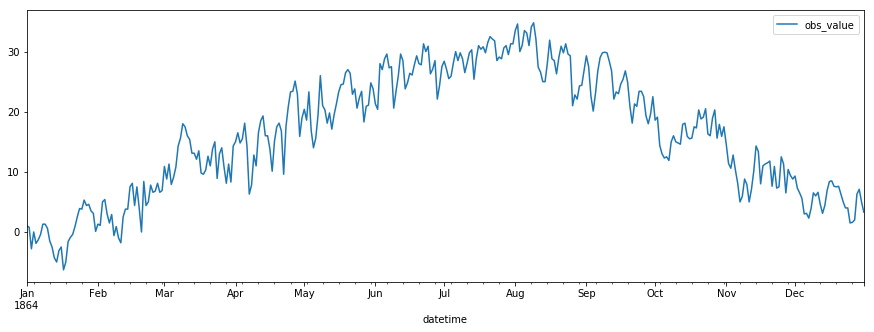

In [80]:
# [Answer to Ex. 6.1.3]
df_ny = df_sorted.reset_index(drop=True).sort_values(by=['datetime'])

df_ny.plot(x='datetime',y='obs_value', figsize=(15,5))


> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [109]:
# [Answer to Ex. 6.1.4]

import re

patterns= [r'\D+'] # Check pattern for only non-numeric characters
GHCND_ID = [] # Create empty list
for i in df_ny['station']: # Loop through all stations
    for p in patterns: # Loop through pattern
        match = re.findall(p, i) # extract country code
        GHCND_ID.append(match[0]) # Append country code to list

print('Set of country codes:',set(GHCND_ID)) # Print set of country codes (unique values)


Set of country codes: {'ITE'}


> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

Set of country codes: {'ITE', 'UK', 'GM', 'ASN', 'CA', 'AU', 'EZE', 'GME', 'EIE', 'AGE', 'BE', 'SZ'}


,station,datetime,obs_type,obs_value,TMAX_F,month
620,CA006158350,1864-01-01,TMAX,1.1,33.98,1
1775,EIE00101859,1864-01-01,TMAX,9.4,48.92,1
5039,ASN00066062,1864-01-01,TMAX,24.4,75.92,1
205,AU000005901,1864-01-01,TMAX,-5.0,23.00,1
607,ITE00100550,1864-01-01,TMAX,1.0,33.80,1
61,EZE00100082,1864-01-01,TMAX,-9.2,15.44,1
4552,ASN00086071,1864-01-01,TMAX,21.4,70.52,1
135,GM000004204,1864-01-01,TMAX,-6.8,19.76,1
550,UK000056225,1864-01-01,TMAX,0.5,32.90,1
320,BE000006447,1864-01-01,TMAX,-2.3,27.86,1


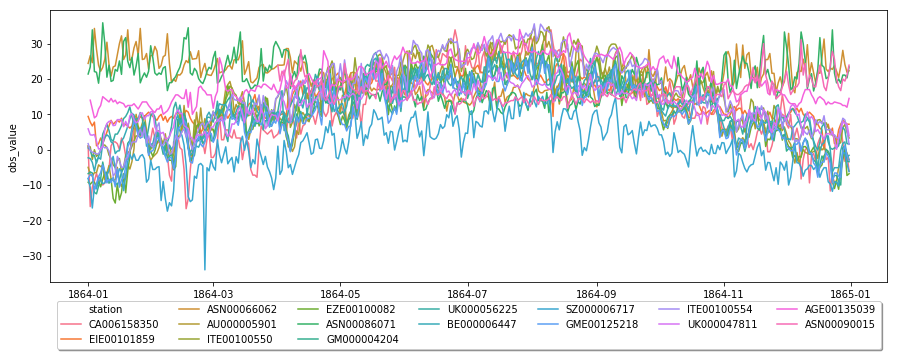

In [138]:
# [Answer to Ex. 6.1.5]
import seaborn as sns
def maxtemp():
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'
    df_weather = pd.read_csv(url,
                             compression='gzip',
                             header=None).iloc[:,:4]
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    df_select = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
    df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
    df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'].astype(str)) # Convert column to string to interpret correctly
    df_sorted['month'] = df_sorted['datetime'].dt.month # Add new column 'month'
    df_ny = df_sorted.reset_index(drop=True).sort_values(by=['datetime'])
    patterns= [r'\D+'] # Check pattern for only non-numeric characters
    GHCND_ID = [] # Create empty list
    for i in df_ny['station']: # Loop through all stations
        for p in patterns: # Loop through pattern
            match = re.findall(p, i) # extract country code
            GHCND_ID.append(match[0]) # append
    print('Set of country codes:',set(GHCND_ID)) # Print set of country codes (unique values), assuming 1 station per country
    fig, ax = plt.subplots(figsize = (15,5))
    sns.lineplot(x=df_ny['datetime'],y=df_ny['obs_value'],hue=df_ny['station'])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=7) # Adding legend to main figure
    return df_ny

display(maxtemp())


##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [ ]:
# [Answer to Ex. 6.2.1]

> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the  `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [ ]:
# [Answer to Ex. 6.2.2]

> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [ ]:
# [Answer to Ex. 6.2.3]

> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [ ]:
# [Answer to Ex. 6.2.4]